In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

%matplotlib inline


### READING DATA FILE

In [288]:
def reading_csv (filename, index):
    '''
    Given the name of the file and index column, reads the csv file,
        and used the index as the index_column
        
    input:
        filename: string
        index: string
        
    returns: dataframe
    '''
    return pd.read_csv (filename, index_col = index)

In [249]:
file_name = 'credit-data.csv'
index_col = 'PersonID'
df = reading_csv (file_name, index_col)

### EXPLORING DATA

In [250]:
# Person experienced 90 days past due delinquency or worse 
positive_df = df[df['SeriousDlqin2yrs'] == 1]

In [251]:
# Person did NOT experience 90 days past due delinquency or worse 
negative_df = df[df['SeriousDlqin2yrs'] == 0]

In [252]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,,,,,,,,,,,,
98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [253]:
df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,,,,,,,,,,,,
123722,0,0.311360,48,60644,0,0.382311,4872.0,11,0,2,0,3.0
123729,0,0.038810,45,60644,0,0.156130,6500.0,13,0,1,0,3.0
123730,0,0.007576,74,60644,0,14.000000,NaN,9,0,0,0,0.0
123739,0,0.052153,72,60644,0,382.000000,NaN,8,0,0,0,0.0
123753,0,1.368872,60,60644,0,0.039417,3500.0,5,3,0,1,0.0


In [254]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [255]:
df.shape

(41016, 12)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41016 entries, 98976 to 123753
Data columns (total 12 columns):
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      39979 non-null float64
dtypes: float64(4), int64(8)
memory usage: 4.1 MB


In [257]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [289]:
df.groupby("SeriousDlqin2yrs").mean().transpose()
# Gives difference between those who were SeriousDlqin2yrs and those who were not.

SeriousDlqin2yrs,0,1
RevolvingUtilizationOfUnsecuredLines,6.821758,4.059138
age,52.807419,45.843807
zipcode,60624.061025,60622.593505
NumberOfTime30-59DaysPastDueNotWorse,0.248197,2.361178
DebtRatio,339.135574,291.567939
MonthlyIncome,6737.181609,5757.098239
NumberOfOpenCreditLinesAndLoans,8.494621,7.929909
NumberOfTimes90DaysLate,0.101698,2.071299
NumberRealEstateLoansOrLines,1.014188,0.980816
NumberOfTime60-89DaysPastDueNotWorse,0.095156,1.807855


Those who were positive:
    - had a lower age: mean age of 45.8 vs 52.8.
    - Were significantly higher at defaulting in the 30-59 days, 60-89 days, and in the 90 day past due limit.
    - Had a lower monthly income.
    - Had more dependents. 

In [282]:
pd.crosstab(df.NumberOfTimes90DaysLate, df.SeriousDlqin2yrs)
# inspired by DataGotham repo

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,33292,4294
1,800,1178
2,164,531
3,64,265
4,30,120
5,8,55
6,8,33
7,2,22
8,2,9


In [260]:
df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

In [261]:
df.NumberOfDependents.value_counts()

0.0     23503
1.0      7211
2.0      5539
3.0      2666
4.0       786
5.0       201
6.0        51
7.0        12
8.0         7
9.0         2
13.0        1
Name: NumberOfDependents, dtype: int64

In [262]:
def draw_correlation_matrix (df, title):
    '''
    Creates a heatmap that shows the correlations between the different variables in a dataframe.
    
    Input:
        df: a dataframe
        title: name of the correlation_matrix
        
    Return:
        Outputs a heatmatrix showing correlations
    
    Code based on: https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
    '''
    ax = plt.axes()
    corr = df.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, ax = ax) 
    ax.set_title (title)

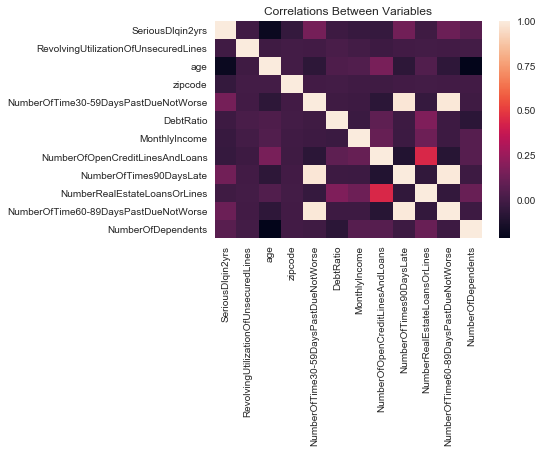

In [263]:
draw_correlation_matrix(df, 'Correlations Between Variables')

Obvious high correlation between being late past payment with 30-59 days and with 90 days and beyond. 

In [264]:
def plotting_curves (dataframe, column, title):
    '''
    Given a dataframe, a column name, and a title,
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        column: column name (string)
        title: string
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    ax = sns.distplot(dataframe[column])
    ax.set_title(title)
    

In [265]:
list_of_columns = df.columns.tolist()

In [266]:
df = df.fillna(df.mean())

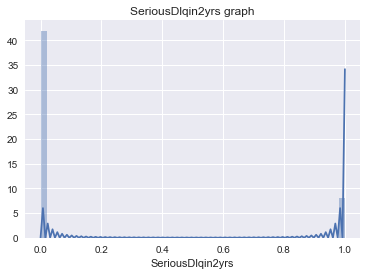

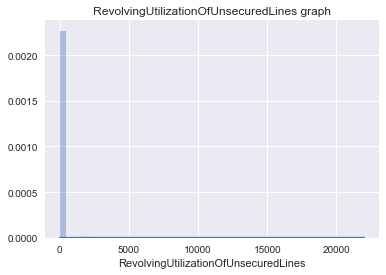

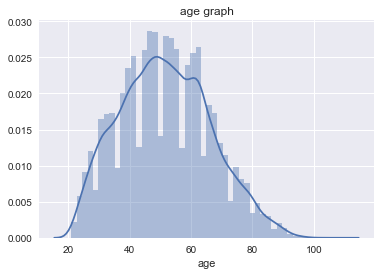

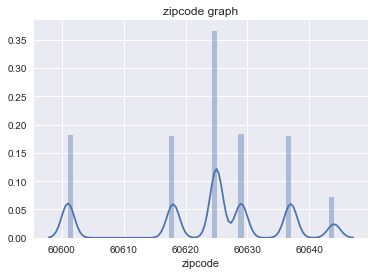

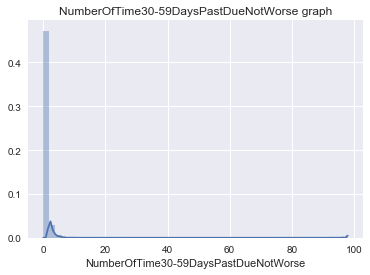

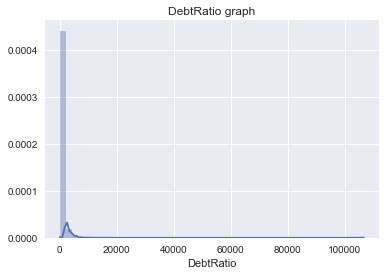

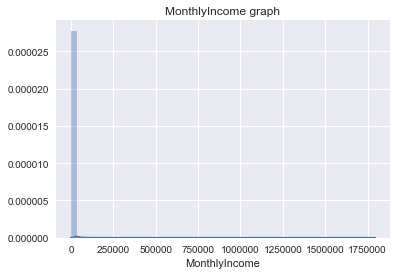

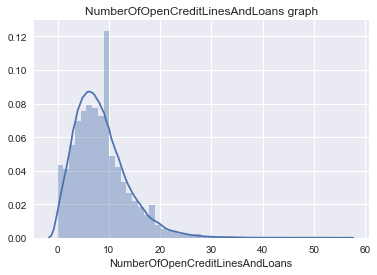

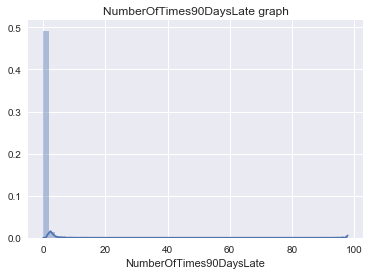

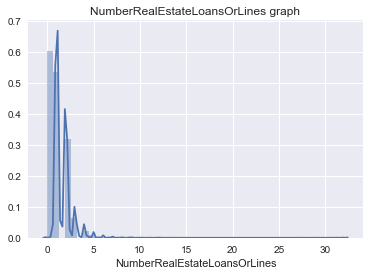

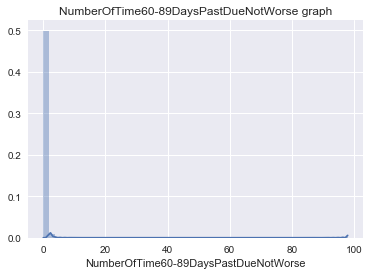

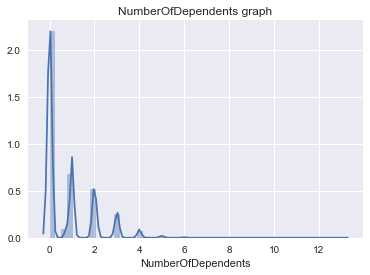

In [267]:
for column in list_of_columns:
    plotting_curves (df, column, column + ' graph')
    plt.show()

In [268]:
positive_df.MonthlyIncome.describe()

count      5528.000000
mean       5594.740774
std        6518.244005
min           0.000000
25%        2940.000000
50%        4500.000000
75%        6811.750000
max      250000.000000
Name: MonthlyIncome, dtype: float64

In [269]:
negative_df.MonthlyIncome.describe()

count    2.751400e+04
mean     6.776748e+03
std      1.443532e+04
min      0.000000e+00
25%      3.450000e+03
50%      5.475000e+03
75%      8.333000e+03
max      1.794060e+06
Name: MonthlyIncome, dtype: float64

### PRE-PROCESSING DATA

In [270]:
df.isnull().sum()
# Have already put in mean for NaN above

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### GENERATING FEATURES/PREDICTORS

In [271]:
def discretizing_variable (dataframe, column, bin_):
    '''
    For a given dataframe and a column,
    this function arranges the column into bins depending on the lower and upper bound.
    Then it arranges each individual into the given bin, and then it gives a value of 1
    for each person that is in a given bin.
    
    Input:
        dataframe
        column: string
        bin_ : integer
        
    Return: 
        a dataframe
        
    Inspired by:
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
    '''
    upper_bound = dataframe.max()
    lower_bound = dataframe.min()
    
    bins = np.arange (lower_bound, upper_bound + bin_, bin_)
    
    data = pd.cut (dataframe, bins)
    
    return pd.get_dummies (data, prefix = column)


In [272]:
categorical_age = discretizing_variable(df["age"],"age_dummy",10)
categorical_zipcode = pd.get_dummies(df["zipcode"])


# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html
new_df = pd.concat([df,categorical_age, categorical_zipcode], axis = 1)

In [273]:
X = df.drop(['SeriousDlqin2yrs'], 1)
Y = df['SeriousDlqin2yrs']
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

# data is different from df
# df was all of the csv file
# data is only the training data
data = X_train.join(Y_train)

In [274]:
data.shape

(32812, 12)

In [275]:
categorical_zipcode = pd.get_dummies(X_test["zipcode"])
categorical_age = get_discrete_var(X_test["age"],"age_dummy",10)
X_test = pd.concat([X_test,categorical_zipcode,categorical_age], axis = 1)

### BUILDING A CLASSIFIER

In [276]:
def log_regression(X_train, Y_train, predictors):
    '''
    Given the training X and Y data, fits for logistic regression.
    
    Input:
        X_train: dataframe
        Y_train: dataframe
        
    Return:
        fitted model with logistic regression
    '''
    model = LogisticRegression(penalty = 'l0', C = 1)
    return model.fit(X_train[features], y_train)

In [283]:
def find_best_k_features(X_train,Y_train, num_of_k):
    '''
    Given the training sets, gives the best num_of_k predictors. 
    
    http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
    '''
    selector = SelectKBest(f_classif, k=num_of_k)
    best_k = selector.fit(X_train, Y_train)

    best_k = best_k.get_support() 
    
    new_predictors = [] 
    for bool, feature in zip(best_k, X_train.columns.values.tolist()):
        if bool:
            new_predictors.append(feature)
    return new_predictors

In [284]:
top_10_predictors = find_best_k_features(X_train,Y_train, 10)

In [285]:
model_top10 = log_reg(X_train,Y_train, top_10_predictors)

### EVALUATING CLASSFIER

In [286]:
def base_rate_model(X):
    '''
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html
    '''
    Y = np.zeros(X.shape[0])
    return Y

In [287]:
Y_base_rate = base_rate_model(X_test)
print("Base case accuracy = ",accuracy_score(Y_test, Y_base_rate))

Y_pred_top10 = model_top10.predict(X_test[top_10_predictors])
print("Model accuracy with top 10 predictors = ", accuracy_score(Y_test, Y_pred_top10))

Base case accuracy =  0.8394685519258898
Model accuracy with top 10 predictors =  0.840809361287177
